In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from glob import glob

import librosa
import librosa.display

import IPython.display as ipd

In [2]:
yolox_audio_files = glob('./Yoloxochitl/*.wav')
buena_audio_files = glob('./Buenavista/*.wav')

In [35]:
print(yolox_audio_files[0])
print(buena_audio_files[0])

./Yoloxochitl/0189_Yolox_RCG500.wav
./Buenavista/0019_Bvsta_GCC527.wav


In [4]:
ipd.Audio(yolox_audio_files[0])

In [5]:
data, sample_rate = librosa.load(yolox_audio_files[0])
print(f'data: {data[:10]}')
print(f'shape data: {data.shape}')
print(f'sample_rate: {sample_rate}')

data: [-4.4781732e-06  9.1972615e-05 -8.6832064e-05 -7.2969106e-04
 -1.7492789e-04  2.7663054e-04 -1.6383709e-04  1.5534501e-03
  2.5534460e-03  3.0996352e-03]
shape data: (209519,)
sample_rate: 22050


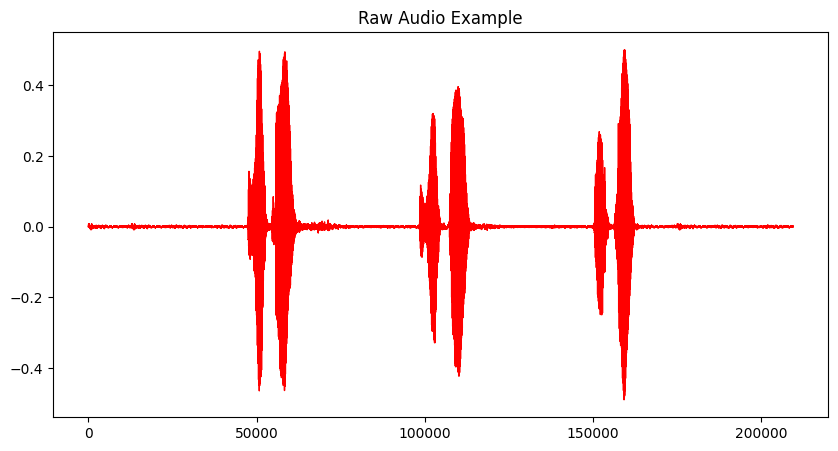

In [6]:
pd.Series(data).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color="red")
plt.show()

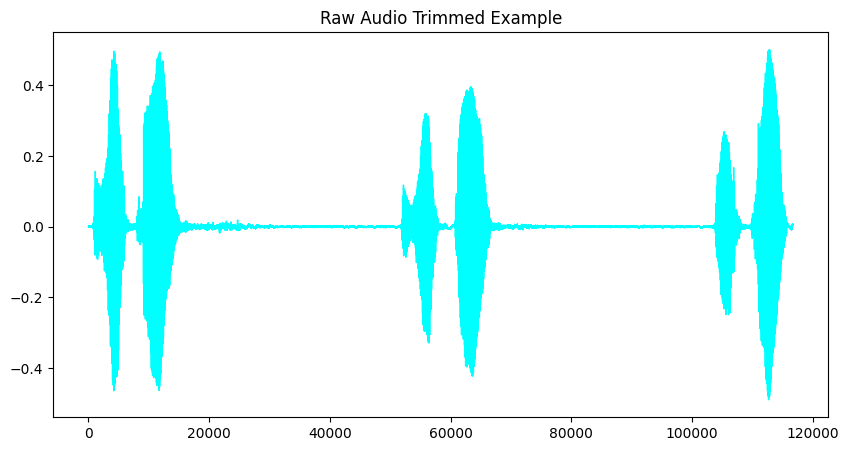

In [19]:
trimmed, i = librosa.effects.trim(data, top_db=36)
pd.Series(trimmed).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Trimmed Example',
                 color="cyan")
plt.show()

<Axes: title={'center': 'First'}>

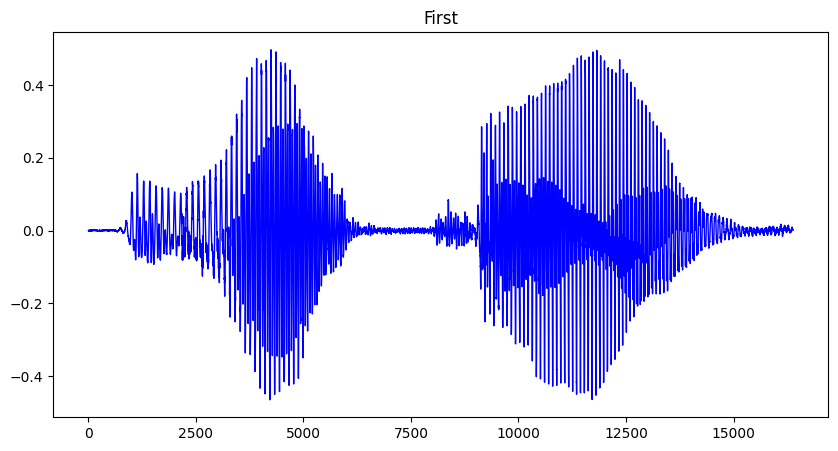

In [31]:
sections = np.array_split(trimmed, 3)
trimmed1, i = librosa.effects.trim(sections[0], top_db=30)
trimmed2, i = librosa.effects.trim(sections[1], top_db=36)
trimmed3, i = librosa.effects.trim(sections[2], top_db=36)


pd.Series(trimmed1).plot(figsize=(10, 5),
                  lw=1,
                  title='First',
                 color="blue")

<Axes: title={'center': 'Second'}>

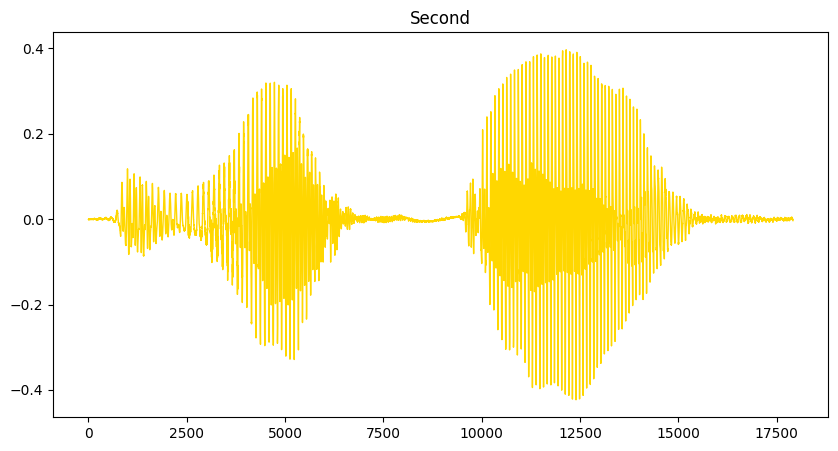

In [32]:
pd.Series(trimmed2).plot(figsize=(10, 5),
                  lw=1,
                  title='Second',
                 color="gold")


<Axes: title={'center': 'Third'}>

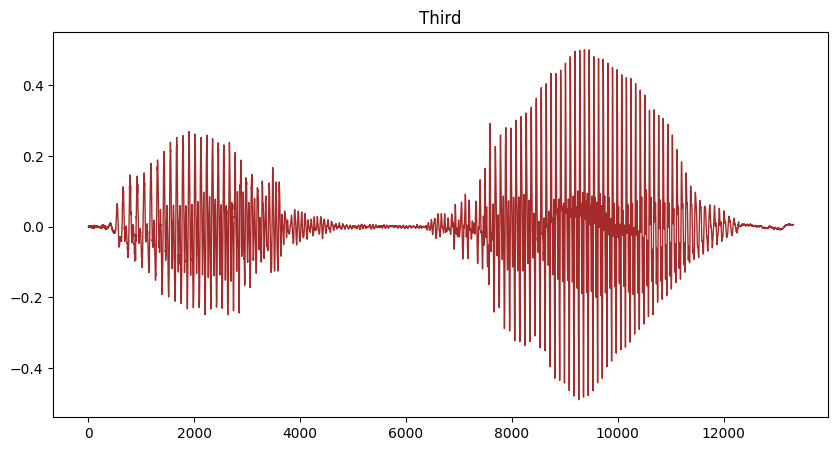

In [33]:
pd.Series(trimmed3).plot(figsize=(10, 5),
                  lw=1,
                  title='Third',
                 color="brown")

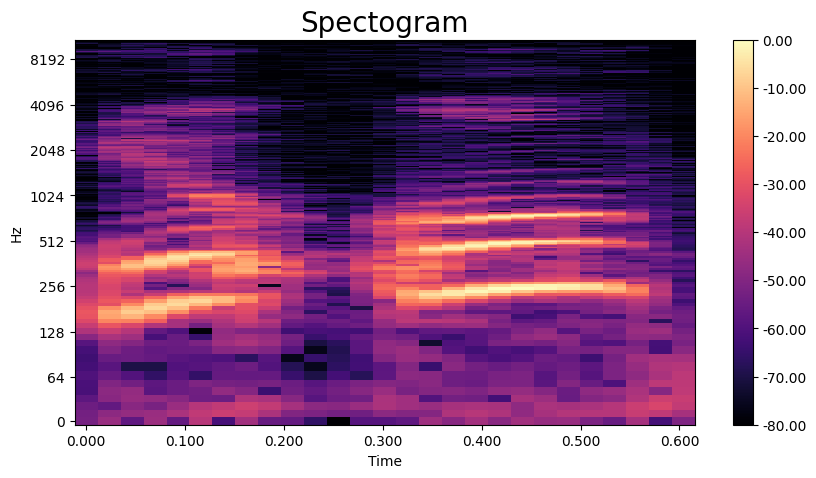

In [39]:
t = librosa.stft(trimmed3)
S_db = librosa.amplitude_to_db(np.abs(t), ref=np.max)
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

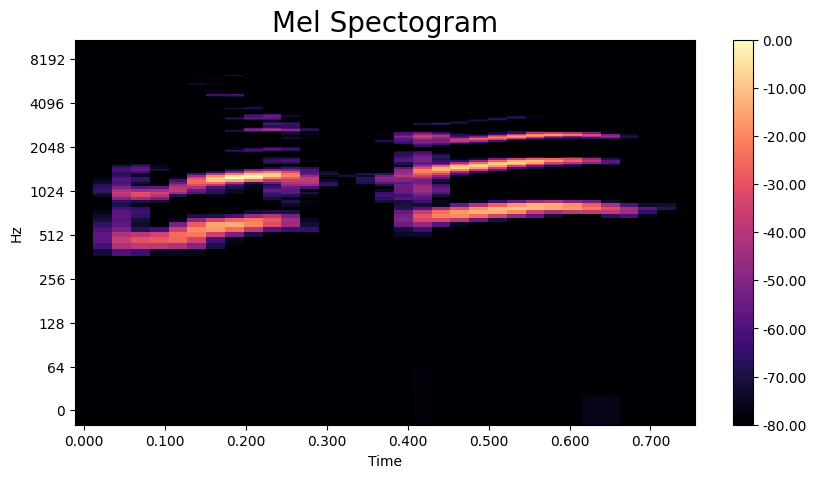

In [40]:
S = librosa.feature.melspectrogram(y=trimmed1,
                                   sr=sample_rate,
                                   n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)
fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

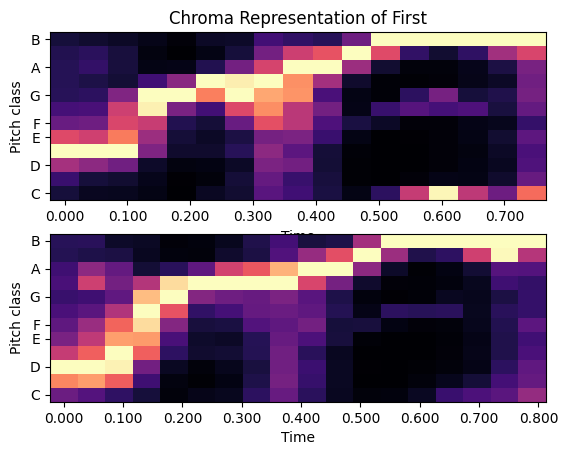

In [47]:
hop_length = 1024

x_1_chroma = librosa.feature.chroma_cqt(y=trimmed1, sr=sample_rate,
                                         hop_length=hop_length)
x_2_chroma = librosa.feature.chroma_cqt(y=trimmed2, sr=sample_rate,
                                         hop_length=hop_length)

fig, ax = plt.subplots(nrows=2, sharey=True)
img = librosa.display.specshow(x_1_chroma, x_axis='time',
                               y_axis='chroma',
                               hop_length=hop_length, ax=ax[0])
ax[0].set(title='Chroma Representation of First')
librosa.display.specshow(x_2_chroma, x_axis='time',
                         y_axis='chroma',
                         hop_length=hop_length, ax=ax[1])
ax[1].set(title='Chroma Representation of Second')
fig.colorbar(img, ax=ax)

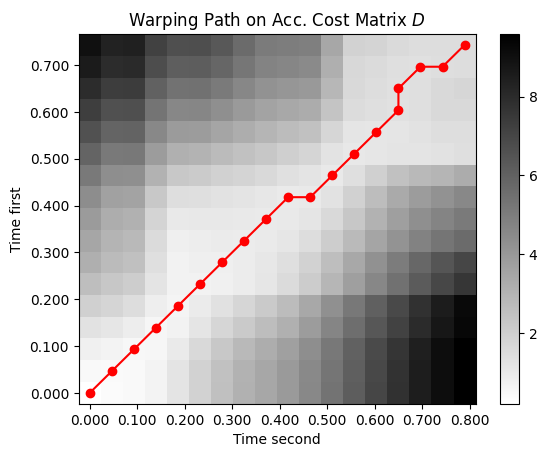

In [60]:
D, wp = librosa.sequence.dtw(X=x_1_chroma, Y=x_2_chroma, metric='cosine')
wp_s = librosa.frames_to_time(wp, sr=sample_rate, hop_length=hop_length)

fig, ax = plt.subplots()
img = librosa.display.specshow(D, x_axis='time', y_axis='time', sr=sample_rate,
                               cmap='gray_r', hop_length=hop_length, ax=ax)
ax.plot(wp_s[:, 1], wp_s[:, 0], marker='o', color='r')
ax.set(title='Warping Path on Acc. Cost Matrix $D$',
       xlabel='Time second', ylabel='Time first')
fig.colorbar(img, ax=ax)



19


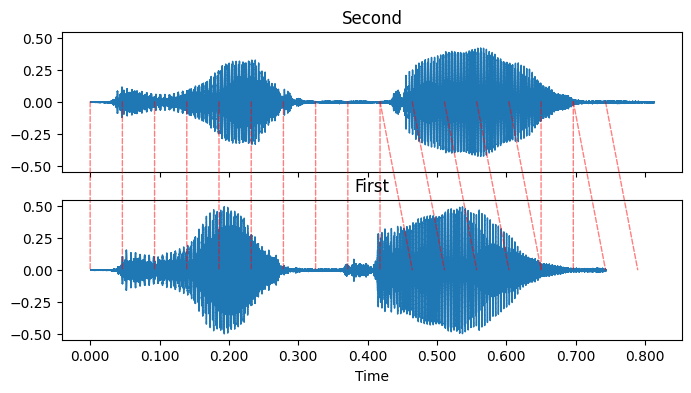

In [59]:
from matplotlib.patches import ConnectionPatch

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(8,4))

librosa.display.waveshow(trimmed1, sr=sample_rate, ax=ax2)
ax2.set(title='First')

librosa.display.waveshow(trimmed2, sr=sample_rate, ax=ax1)
ax1.set(title='Second')
ax1.label_outer()


n_arrows = 10
print(len(wp_s))
for tp1, tp2 in wp_s[::len(wp_s)//n_arrows]:
    con = ConnectionPatch(xyA=(tp1, 0), xyB=(tp2, 0),
                          axesA=ax1, axesB=ax2,
                          coordsA='data', coordsB='data',
                          color='r', linestyle='--',
                          alpha=0.5)
    con.set_in_layout(False)  # This is needed to preserve layout
    ax2.add_artist(con)